In [331]:
import pandas as pd
from os import path
import numpy as np
import scipy
from scipy import stats, optimize, interpolate
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [332]:

def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

def write_to_csv(df,filepath):
    '''
    input: df - a pandas DataFrame
           filepath - an output filepath as a string

    writes to a csv file
    in same diretory as this script

    returns: nothing
    '''
    # if no csv exists
    if not path.exists(filepath):
        df.to_csv(filepath,index=False)
    else:
        df.to_csv(filepath, mode='a', header=False,index=False)


In [333]:
'''
hypothesis testing
age of women nominated vs overall age of women 
age of women nominated vs age of women win

non-nominated vs nominated vs winner degree

logistic model
'''

'\nhypothesis testing\nage of women nominated vs overall age of women \nage of women nominated vs age of women win\n\nnon-nominated vs nominated vs winner degree\n\nlogistic model\n'

In [334]:
all_acting_clean_path = '../../data/imbd_data/all_acting_clean.csv'

In [335]:
def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

def write_to_csv(df,filepath):
    '''
    input: df - a pandas DataFrame
           filepath - an output filepath as a string

    writes to a csv file
    in same diretory as this script

    returns: nothing
    '''
    # if no csv exists
    if not path.exists(filepath):
        df.to_csv(filepath,index=False)
    else:
        df.to_csv(filepath, mode='a', header=False,index=False)

In [336]:
# load dataset
df = load_dataset(all_acting_clean_path)
print(df.head(1))


C:\Users\coconut\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


      nconst     tconst          name  birthYear  deathYear profession  \
0  nm0000001  tt0025164  Fred Astaire       1899     1987.0      actor   

       primaryTitle     originalTitle  film_year gender  age  degree  \
0  The Gay Divorcee  The Gay Divorcee       1934      M   35       3   

   year_ceremony  ceremony category winner  num_times_nominated  
0            NaN       NaN      NaN    NaN                  NaN  


In [337]:
print(len(df[df.ceremony.notna()]))
print(len(df[df.winner==False]))
print(len(df[df.winner==True]))
print(len(df[df.gender=='F']))
print(len(df[df.gender=='M']))
print(len(df[df.num_times_nominated>=1]))
print(df.info())

708
553
155
656712
1500940
0
708
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157652 entries, 0 to 2157651
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   nconst               object 
 1   tconst               object 
 2   name                 object 
 3   birthYear            int64  
 4   deathYear            float64
 5   profession           object 
 6   primaryTitle         object 
 7   originalTitle        object 
 8   film_year            int64  
 9   gender               object 
 10  age                  int64  
 11  degree               int64  
 12  year_ceremony        float64
 13  ceremony             float64
 14  category             object 
 15  winner               object 
 16  num_times_nominated  float64
dtypes: float64(4), int64(4), object(9)
memory usage: 279.8+ MB
None


In [340]:
# Get data to compare

# get non nominated 
F_non_nominated = df[(df.category.isna()) & (df.gender =='F')]
M_non_nominated = df[(df.category.isna()) & (df.gender =='M')]
non_nominated = df[df.category.isna()]

# get nominated that did not win
F_nominated_nowin = df[(df.category.notna()) & (df.gender =='F') & (df.winner == False)]
M_nominated_nowin = df[(df.category.notna()) & (df.gender =='M') & (df.winner == False)]
nominated_nowin = df[(df.category.notna()) & (df.winner == False)]

# get nominated that won
F_nominated_win = df[(df.category.notna()) & (df.gender =='F') & (df.winner == True)]
M_nominated_win = df[(df.category.notna()) & (df.gender =='M') & (df.winner == True)]
nominated_win = df[(df.category.notna()) & (df.winner == True)]

In [341]:
# Get variances
print("Age")
print("var")
print(F_non_nominated.age.var())
print(F_nominated_nowin.age.var())
print(F_nominated_win.age.var())
print()
print(M_non_nominated.age.var())
print(M_nominated_nowin.age.var())
print(M_nominated_win.age.var())
print()
print(nominated_nowin.age.var())
print(non_nominated.age.var())
print(nominated_win.age.var())

print()
print("mean")
# Get means
print(F_non_nominated.age.mean())
print(F_nominated_nowin.age.mean())
print(F_nominated_win.age.mean())
print()
print(M_non_nominated.age.mean())
print(M_nominated_nowin.age.mean())
print(M_nominated_win.age.mean())
print()
print(nominated_nowin.age.mean())
print(non_nominated.age.mean())
print(nominated_win.age.mean())

print("t-test")
# female non-nominated age vs female nominated age, two tailed t test
print(scipy.stats.ttest_ind(F_non_nominated.age, F_nominated_nowin.age,equal_var=False))
# With a p-value of pvalue=5.146948087933675e-06 < 0.05, p-value is statistically significant
# When looking between the mean ages of non-nominated and nominated actresses that didn't win
# we can reject the null hypothesis that the true difference between these group means is zero

# female nominated age vs female winner age, two tailed t test
print(scipy.stats.ttest_ind(F_nominated_nowin.age, F_nominated_win.age,equal_var=False))
# With a p-value of pvalue=0.827905761522576 > 0.05, p-value is not statistically significant
# When looking between the mean ages of nominated actresses that didnt win and nominated actresses that won
# we fail to reject the null hypothesis that the true difference between these group means is zero

# male non-nominated age vs male nominated age, two tailed t test
print(scipy.stats.ttest_ind(M_non_nominated.age, M_nominated_nowin.age,equal_var=False))
# With a p-value of pvalue=0.1517846992571984 > 0.05, p-value is statistically significant
# When looking between the mean ages of non-nominated and nominated actors that didn't win
# we fail to reject the null hypothesis that the true difference between these group means is zero

# male nominated age vs male win age, two tailed t test
print(scipy.stats.ttest_ind(M_nominated_nowin.age, M_nominated_win.age,equal_var=False))
# With a p-value of pvalue=0.005651119663406276 < 0.05, p-value is statistically significant
# When looking between the mean ages of nominated actors that didnt win and nominated actors that won
# we can reject the null hypothesis that the true difference between these group means is zero

# all non_nominated age vs all nominated age, two tailed t test
print(scipy.stats.ttest_ind(non_nominated.age, nominated_nowin.age,equal_var=False))
# With a p-value of pvalue=3.8045497924195786e-06 < 0.05, p-value is statistically significant
# When looking between the mean ages of non-nominated and nominated actors/actresses that didnt win
# we can reject the null hypothesis that the true difference between these group means is zero

# all nominated age vs all winner age, two tailed t test
print(scipy.stats.ttest_ind(nominated_nowin.age, nominated_win.age,equal_var=False))
# With a p-value of pvalue=0.024790517590156342 < 0.05, p-value is statistically significant
# When looking between the mean ages of nominated and nominated actors/actresses that won
# we can reject the null hypothesis that the true difference between these group means is zero

Age
var
266.5522527695297
162.64037097654113
254.8295081967213

183.87648255203675
170.73885483006964
179.0697780828186

175.6580902586682
211.0943604667617
230.7534981147884

mean
43.05805007799932
39.17446808510638
39.65573770491803

46.175506888242005
45.12264150943396
49.51063829787234

42.59493670886076
45.22678103835797
45.63225806451613
t-test
Ttest_indResult(statistic=4.6668609479295045, pvalue=5.146948087933675e-06)
Ttest_indResult(statistic=-0.2180925995082944, pvalue=0.827905761522576)
Ttest_indResult(statistic=1.4367151409697567, pvalue=0.1517846992571984)
Ttest_indResult(statistic=-2.808026951682208, pvalue=0.005651119663406276)
Ttest_indResult(statistic=4.668977614513097, pvalue=3.8045497924195786e-06)
Ttest_indResult(statistic=-2.2598854635604515, pvalue=0.024790517590156342)


In [342]:
# Get variances
print("degree")
print("var")
print(F_non_nominated.degree.var())
print(F_nominated_nowin.degree.var())
print(F_nominated_win.degree.var())
print()
print(M_non_nominated.degree.var())
print(M_nominated_nowin.degree.var())
print(M_nominated_win.degree.var())
print()
print(nominated_nowin.degree.var())
print(non_nominated.degree.var())
print(nominated_win.degree.var())

print()
print("mean")
# Get means
print(F_non_nominated.degree.mean())
print(F_nominated_nowin.degree.mean())
print(F_nominated_win.degree.mean())
print()
print(M_non_nominated.degree.mean())
print(M_nominated_nowin.degree.mean())
print(M_nominated_win.degree.mean())
print()
print(nominated_nowin.degree.mean())
print(non_nominated.degree.mean())
print(nominated_win.degree.mean())

print("t-test")
# female non-nominated degree vs female nominated degree, two tailed t test
print(scipy.stats.ttest_ind(F_non_nominated.degree, F_nominated_nowin.degree,equal_var=False))
# With a p-value of pvalue=0.4126191465168062 > 0.05, p-value is not statistically significant
# When looking between the means degree of non-nominated and nominated actresses that didnt win
# we fail to reject the null hypothesis that the true difference between these group means is zero

# female nominated degree vs female winner degree, two tailed t test
print(scipy.stats.ttest_ind(F_nominated_nowin.degree, F_nominated_win.degree,equal_var=False))
# With a p-value of pvalue=0.35596478696700407 > 0.05, p-value is not statistically significant
# When looking between the means degree of nominated actresses that didnt win and nominated actresses that won
# we fail to reject the null hypothesis that the true difference between these group means is zero

# male non-nominated degree vs male nominated degree, two tailed t test
print(scipy.stats.ttest_ind(M_non_nominated.degree, M_nominated_nowin.degree,equal_var=False))
# With a p-value of pvalue=0.222640753346406 > 0.05, p-value is statistically significant
# When looking between the means degree of non-nominated and nominated actors that didn't win
# we fail to reject the null hypothesis that the true difference between these group means is zero

# male nominated degree vs male win degree, two tailed t test
print(scipy.stats.ttest_ind(M_nominated_nowin.degree, M_nominated_win.degree,equal_var=False))
# With a p-value of pvalue=0.012261173473140811 < 0.05, p-value is statistically significant
# When looking between the means degree of nominated actors that didnt win and nominated actors that won
# we can reject the null hypothesis that the true difference between these group means is zero

# all non_nominated degree vs all nominated degree, two tailed t test
print(scipy.stats.ttest_ind(non_nominated.degree, nominated_nowin.degree,equal_var=False))
# With a p-value of pvalue=0.8631759163657139 > 0.05, p-value is not statistically significant
# When looking between the means degree of non-nominees and nominees that didn't win
# we fail to reject the null hypothesis that the true difference between these group means is zero

# all nominated degree vs all winner degree, two tailed t test
print(scipy.stats.ttest_ind(nominated_nowin.degree, nominated_win.degree,equal_var=False))
# With a p-value of pvalue=0.006861115960748926 < 0.05, p-value is statistically significant
# When looking between the means degree of nominees that didn't win and nominees that won
# we can reject the null hypothesis that the true difference between these group means is zero

degree
var
6335.161601141182
3745.1754137115868
4219.362295081967

13628.57309914145
8325.272741701876
12698.666323495774

6631.1230246088535
11523.079644709609
10077.733556765816

mean
80.65200878711062
77.37446808510639
85.93442622950819

103.86621709158376
110.11949685534591
142.37234042553192

96.20433996383363
96.80150991402651
120.16129032258064
t-test
Ttest_indResult(statistic=0.8207567855535283, pvalue=0.4126191465168062)
Ttest_indResult(statistic=-0.9278751313429546, pvalue=0.35596478696700407)
Ttest_indResult(statistic=-1.221931507303604, pvalue=0.222640753346406)
Ttest_indResult(statistic=-2.539733357772444, pvalue=0.012261173473140811)
Ttest_indResult(statistic=0.17241309451208375, pvalue=0.8631759163657139)
Ttest_indResult(statistic=-2.729991581539571, pvalue=0.006861115960748926)


In [343]:
#select appropriate variables
df = df[["gender","age","degree","category","winner","num_times_nominated"]]

# turn label variables to integers
df.loc[(df.winner == False),'winner']=0
df.loc[(df.winner == True),'winner']=1
df.loc[(df.winner.isna()),'winner']=0
print(len(df[df.winner==0]))
print(len(df[df.winner==1]))

df.loc[(df.gender == 'F'),'gender']=0
df.loc[(df.gender == 'M'),'gender']=1
print(len(df[df.gender==0]))
print(len(df[df.gender==1]))

df.loc[(df.num_times_nominated.isna()),'num_times_nominated']=0
print(len(df[df.num_times_nominated==0]))
print(len(df[df.num_times_nominated>=1]))

df.loc[(df.num_times_nominated==0),'nominated']=0
df.loc[(df.num_times_nominated>=1),'nominated']=1
print(len(df[df.nominated==0]))
print(len(df[df.nominated==1]))

# change types from float to int
df.nominated = df.nominated.astype(int)
df.num_times_nominated = df.num_times_nominated.astype(int)
df.gender = df.gender.astype(int)
df.winner = df.winner.astype(int)

2157497
155
656712
1500940
2156944
708
2156944
708


In [344]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157652 entries, 0 to 2157651
Data columns (total 7 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   gender               int32 
 1   age                  int64 
 2   degree               int64 
 3   category             object
 4   winner               int32 
 5   num_times_nominated  int32 
 6   nominated            int32 
dtypes: int32(4), int64(2), object(1)
memory usage: 82.3+ MB
None
             gender           age        degree        winner  \
count  2.157652e+06  2.157652e+06  2.157652e+06  2.157652e+06   
mean   6.956358e-01  4.522614e+01  9.680303e+01  7.183735e-05   
std    4.601377e-01  1.452888e+01  1.073394e+02  8.475389e-03   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  3.400000e+01  2.700000e+01  0.000000e+00   
50%    1.000000e+00  4.400000e+01  6.400000e+01  0.000000e+00   
75%    1.000000e+00  5.500000e+01  1.290000e+02  0.000000e+00   
max  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 84 to 2006056
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gender               708 non-null    int32
 1   age                  708 non-null    int64
 2   degree               708 non-null    int64
 3   winner               708 non-null    int32
 4   num_times_nominated  708 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 24.9 KB
None
Accuracy of logistic regression classifier on test set: 0.78


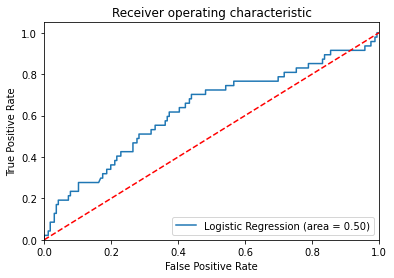

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       166
           1       0.00      0.00      0.00        47

    accuracy                           0.78       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.61      0.78      0.68       213

[[166   0]
 [ 47   0]]
Optimization terminated successfully.
         Current function value: 0.538838
         Iterations 6
                          Results: Logit
Model:                Logit             Pseudo R-squared:  -0.027  
Dependent Variable:   winner            AIC:               541.4497
Date:                 2021-08-10 11:30  BIC:               558.2679
No. Observations:     495               Log-Likelihood:    -266.72 
Df Model:             3                 LL-Null:           -259.68 
Df Residuals:         491               LLR p-value:       1.0000  
Converged:            1.0000            Scale:             1.0000  
No. Iterations:       6.0000   

C:\Users\coconut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [345]:
# LOGISTIC REGRESSION nominees

# look at nominated and winners only
df_nominees = df[df.nominated==1]
df_nominees = df_nominees[["gender","age","degree","winner","num_times_nominated"]]
print(df_nominees.info())


X = df_nominees[['gender','age','num_times_nominated','degree']]
y = df_nominees['winner']


# Divide test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# start logistic regrssion
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

# ROC
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


#logistic regression model
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())


logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157497 entries, 0 to 2157651
Data columns (total 4 columns):
 #   Column     Dtype
---  ------     -----
 0   gender     int32
 1   age        int64
 2   degree     int64
 3   nominated  int32
dtypes: int32(2), int64(2)
memory usage: 65.8 MB
None
Accuracy of logistic regression classifier on test set: 1.00


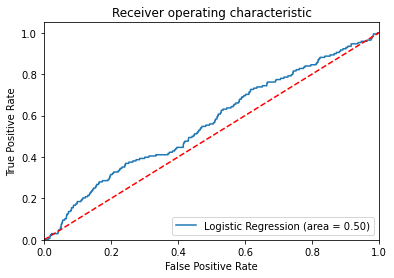

In [346]:
# LOGISTIC REGRESSION nominees nonwinners and non-nominees
df_non_and_nominees = df[df.winner==0]
df_non_and_nominees = df_non_and_nominees[["gender","age","degree","nominated"]]

print(df_non_and_nominees.info())


X = df_non_and_nominees[["gender","age","degree"]]
y = df_non_and_nominees['nominated']


# Divide test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# start logistic regrssion
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

# ROC
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [347]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\coconut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    647082
           1       0.00      0.00      0.00       168

    accuracy                           1.00    647250
   macro avg       0.50      0.50      0.50    647250
weighted avg       1.00      1.00      1.00    647250



In [352]:
#logistic regression model
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())


logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.003643
         Iterations 13
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.541    
Dependent Variable: nominated        AIC:              11009.3852
Date:               2021-08-10 18:50 BIC:              11046.0685
No. Observations:   1510247          Log-Likelihood:   -5501.7   
Df Model:           2                LL-Null:          -3570.6   
Df Residuals:       1510244          LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     13.0000                                      
------------------------------------------------------------------
             Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
gender      -1.5656    0.0738   -21.2230  0.0000  -1.7101  -1.4210
age         -0.2468    0.0024  -101.1048  0.0000  -0.2516  -0